In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns


## Part 1:
### A) & B) Show the distribution of phi and psi combinations using a scatter plot and a heatmap



## Part 1:
### A) & B) Show the distribution of phi and psi combinations using a scatter plot and a heatmap



In [81]:
data = pd.read_csv('./Resources/assignment3-data.csv')

In [82]:
data.head(3)
org_data = data.copy()

Text(0, 0.5, 'PHI')

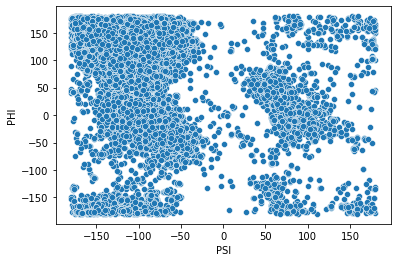

In [86]:
heatmap, xedges, yedges = np.histogram2d(data['psi'], data['phi'], bins=(15,15))
sns.scatterplot(data=data, x="phi", y="psi")

plt.xlabel("PSI")
plt.ylabel("PHI")






#seaborn.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)

(0.0, 15.0)

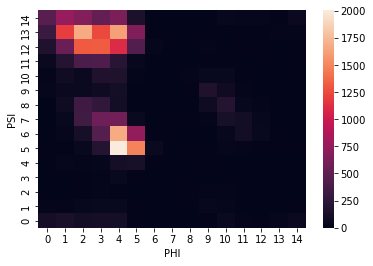

In [91]:
sns.heatmap(heatmap)
plt.xlabel("PHI")
plt.ylabel("PSI")
plt.xlim(0,15)
plt.ylim(0,15)


### Part 2:
Use  the  K-means  clustering  method to  cluster  the  phi  and psi  angle  combinations  in  the data file

In [6]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [7]:
data = data[['phi','psi']]


In [8]:
kmeans = KMeans(3).fit(data)
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-105.18555934  134.59172163]
 [ -78.07473094  -36.95145038]
 [  87.55008471    8.80213455]]
[0 0 1 ... 0 1 0]


Text(0.5, 1.0, 'Phi vs Psi, KMean(k=3)')

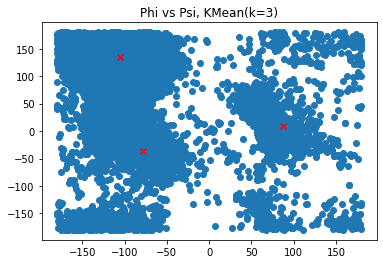

In [9]:

plt.scatter(data['phi'],data['psi'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='x')
plt.title('Phi vs Psi, KMean(k=3)')

### A)
Experiment with different values of K. Suggest an appropriate value of K for this 
task and motivate this choice

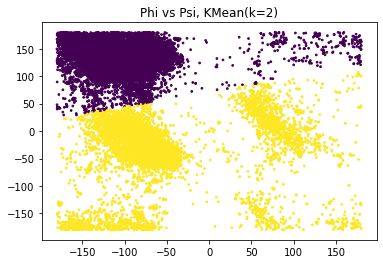

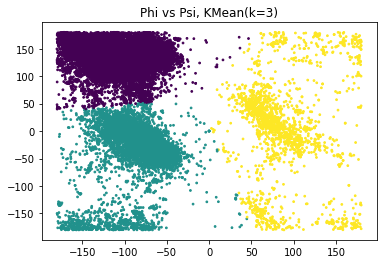

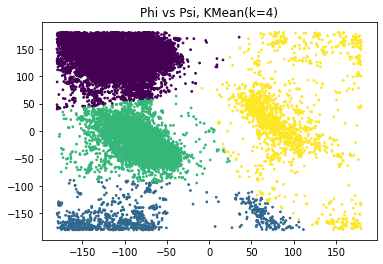

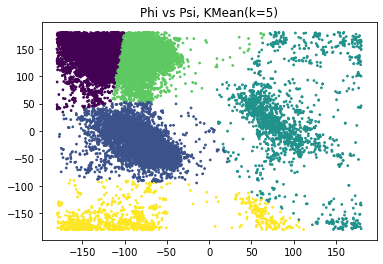

In [10]:
def showClusters(df,k):
    temp = df
    kmeans = KMeans(k, random_state=0).fit(temp)
    identified_clusters = kmeans.fit_predict(temp)
    cluster_data = temp.copy()
    cluster_data['Cluster'] = identified_clusters
    plt.scatter(cluster_data['phi'],cluster_data['psi'],c=cluster_data['Cluster'],s=3)
    plt.title('Phi vs Psi, KMean(k={k_val})'.format(k_val=k))
    return plt

showClusters(data,2).show()
showClusters(data,3).show()
showClusters(data,4).show()
showClusters(data,5).show()

<function matplotlib.pyplot.show(close=None, block=None)>

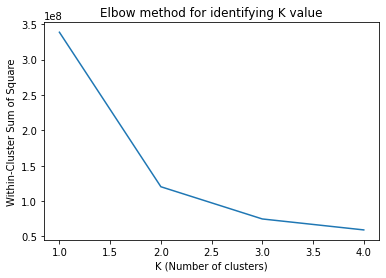

In [11]:
# Within-Cluster Sum of Square
wcss=[]

for i in range(1,5):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

number_clusters = range(1,5)
plt.plot(number_clusters,wcss)
plt.title('Elbow method for identifying K value')
plt.xlabel('K (Number of clusters)')
plt.ylabel('Within-Cluster Sum of Square')
plt.show

Elbow method shows K = 3 to be optimal as the increase in sum of square beings, any higher risks over-clustering.

### B) 
#### Validate the clusters that are found with the chosen value of K.  

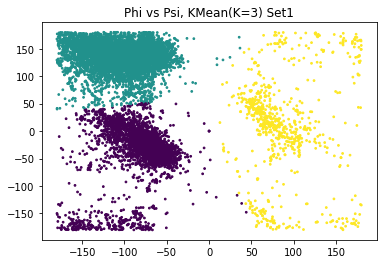

In [12]:
# By creating subsamples, we split the data into three separate sets and cluster with K = 3
set1 = data.sample(frac = 0.4)
set2 = data.drop(set1.index).sample(frac = 0.3)
set3 = data.drop(set1.index).drop(set2.index)



set1_plt = showClusters(set1,3).title('Phi vs Psi, KMean(K=3) Set1')

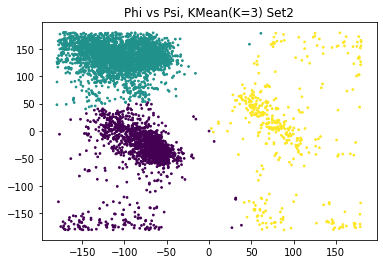

In [13]:
set2_plt = showClusters(set2,3).title('Phi vs Psi, KMean(K=3) Set2')


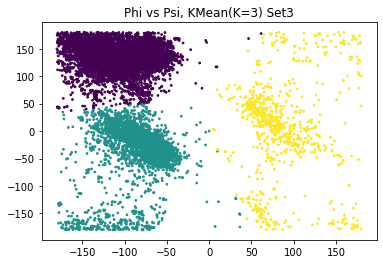

In [14]:
set3_plt = showClusters(set3,3).title('Phi vs Psi, KMean(K=3) Set3')



In [15]:
## cluster assumed stable

### C) 
Do the clusters found in part 2.a seem reasonable?

### D)
Can you change the data to get better results (or the same results in a simpler way)?

<module 'matplotlib.pyplot' from 'c:\\Users\\Johan Birgersson\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

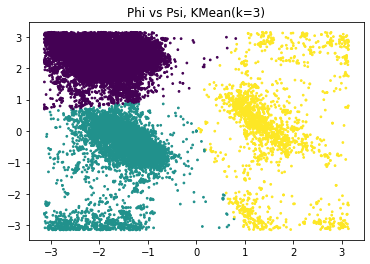

In [16]:
temp = data.copy()
data_rad = temp.apply(np.radians)
showClusters(data_rad,3)

<module 'matplotlib.pyplot' from 'c:\\Users\\Johan Birgersson\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

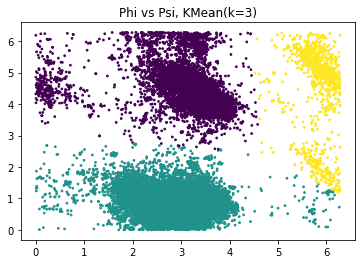

In [17]:

temp = data_rad.copy()
data_shift = (temp - np.pi/2) % (2*np.pi)
showClusters(data_shift,3)



## Part 3:
 Use the DBSCAN method to cluster the phi and psi angle combinations in the data file

In [45]:
from sklearn.cluster import DBSCAN

def plot_dbscan_cluster(df, eps, min_samples,show):
    
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    #  **core_sample_indices_ method in DBSCAN function says what?**
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    #print('Estimated number of clusters: %d' % n_clusters_)
    #print('Estimated number of noise points: %d' % n_noise_)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):          
            class_member_mask = (labels == k)
            if i != -1: # noise
                xy = D_train[class_member_mask & core_samples_mask]
                plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=7)
                nonCore = D_train[class_member_mask & ~core_samples_mask]
                plt.plot(nonCore[:, 0], nonCore[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3)

    print('Non-Core (outliers) in sample: ' + str(len(nonCore)))
    plt.title('Estimated number of clusters: %d' % n_clusters_+'(DBSCAN, EPS ='+str(eps)+' min_sample ='+ str(min_samples)+')')
    plt.xlabel('psi')
    plt.ylabel('phi')
    if show == "show":
        plt.show()
    return (xy,nonCore)    

(29000.0, 29500.0)

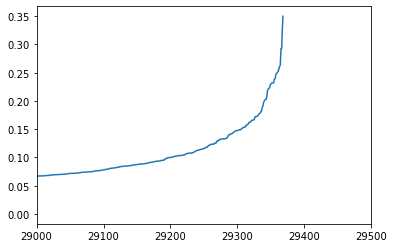

In [46]:
D_train = data_shift[['phi','psi']]
D_train = D_train.loc[:, ["phi", "psi"]].values.reshape(-1, 2)

from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(D_train)
distances, indices = neighbors_fit.kneighbors(D_train)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlim(29000,29500)



Non-Core (outliers) in sample: 28


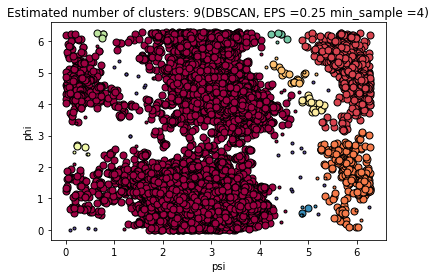

Non-Core (outliers) in sample: 68
Non-Core (outliers) in sample: 118


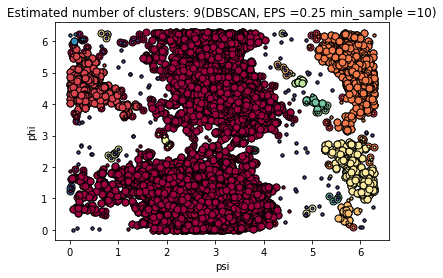

Non-Core (outliers) in sample: 213
Non-Core (outliers) in sample: 197


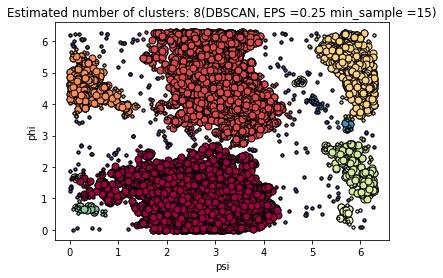

Non-Core (outliers) in sample: 352
Non-Core (outliers) in sample: 305


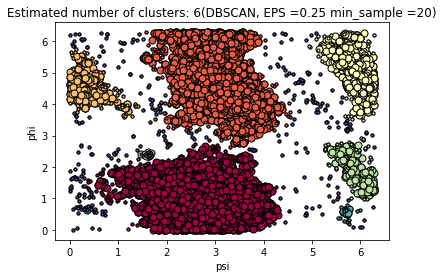

Non-Core (outliers) in sample: 536
Non-Core (outliers) in sample: 426


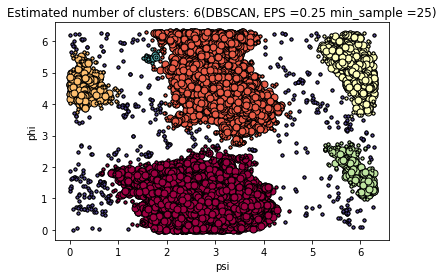

Non-Core (outliers) in sample: 668


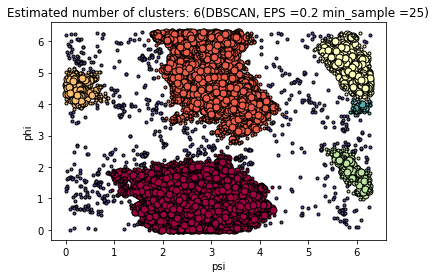

In [55]:
plot_dbscan_cluster(D_train, 0.25, 4,"show")
outliers = plot_dbscan_cluster(D_train, 0.2, 4," ")[1]

plot_dbscan_cluster(D_train, 0.25, 10,"show")
outliers = plot_dbscan_cluster(D_train, 0.2, 10," ")[1]

plot_dbscan_cluster(D_train, 0.25, 15,"show")
outliers = plot_dbscan_cluster(D_train, 0.2, 15," ")[1]

plot_dbscan_cluster(D_train, 0.25, 20,"show")
outliers = plot_dbscan_cluster(D_train, 0.2, 20," ")[1]


plot_dbscan_cluster(D_train, 0.25, 25,"show")
outliers = plot_dbscan_cluster(D_train, 0.2, 25," ")[1]

a. Motivate: i. the  choice  of the  minimum number  of  samples in the  neighbourhood  
for a point to be considered as a core point, and ii. the  choice  of  the  maximum distance between two  samples  belonging 
to the same neighbourhood (“eps” or “epsilon”)

MINSAMPLE : For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998)

EPS: Nadia Rahmah and Imas Sukaesih Sitanggang 2016 IOP Conf. Ser.: Earth Environ. Sci. 31 012012


b. Highlight  the  clusters  found  using  DBSCAN  and  any  outliers  in  a  scatter  plot.  
How  many  outliers  are  found?  Plot  a  bar  chart  to  show  which  amino  acid  
residue types are most frequently outliers. 

In [48]:


df_names = org_data[['residue name','phi','psi']]
temp = df_names[['phi','psi']].apply(np.radians)
df_names[['phi','psi']] = (temp - np.pi/2) % (2*np.pi)

df_names= df_names

outliers = pd.DataFrame(outliers, columns=['phi','psi'])
#perform merge if phi and psi are equal.
named_outliers = outliers.merge(df_names, how = 'inner', on = ['phi', 'psi'])
named_outliers




C:\Users\Johan Birgersson\AppData\Local\Temp\ipykernel_1232\2550920947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_names[['phi','psi']] = (temp - np.pi/2) % (2*np.pi)


,phi,psi,residue name
0,2.025160,2.208915,ASP
1,1.671304,3.988873,GLY
2,1.996662,2.619680,VAL
3,5.598888,0.726132,LYS
4,0.048360,5.552026,GLY
...,...,...,...
683,0.391966,3.599591,ASN
684,0.320870,1.383467,ARG
685,5.526154,0.395515,ASN
686,6.247624,3.019912,GLY


Plot outliers

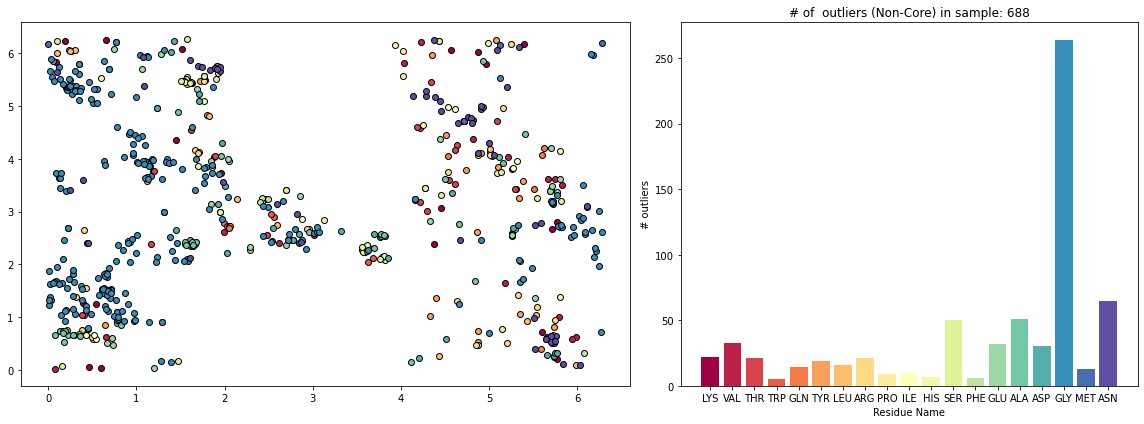

In [51]:
f, axs = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw=dict(width_ratios=[4, 3]))

unique_labels = set(named_outliers['residue name'])
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
from collections import defaultdict
bar_chart_data= {}
bar_chart_data = defaultdict(lambda:0,bar_chart_data)

for k, col in zip(unique_labels, colors):
      axs[0].plot(named_outliers['phi'].loc[named_outliers['residue name'] == k], named_outliers['psi'].loc[named_outliers['residue name'] == k], 'o', markerfacecolor=tuple(col), markeredgecolor='k', label = k)
      bar_chart_data[k] += len(named_outliers['phi'].loc[named_outliers['residue name'] == k])
plt.title('# of  outliers (Non-Core) in sample: ' + str(len(named_outliers)))

plt.xlabel('Residue Name')
plt.ylabel('# outliers')

for k, col in zip(unique_labels, colors):
    axs[1].bar(k, bar_chart_data.get(k),color=tuple(col))
    
    
f.tight_layout()    

### C. Compare the clusters found by DBSCAN with those found using K-means. 

TBD


### D. 
Discuss whether the clusters found using DBSCAN are robust to small changes 
in  the  minimum  number  of  samples  in  the  neighbourhood  for  a  point  to  be  
considered  as  a  core  point,  and/or  the  choice  of  the  maximum  distance  
between two samples belonging to the same neighbourhood (“eps” or 
“epsilon”).  

In [60]:
def dbscan_plotD(EPS,MINSAMPLE,df,label):
    
    db = DBSCAN(eps=EPS, min_samples=MINSAMPLE).fit(df)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)    
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    n_noise_ = list(labels).count(-1)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):          
        class_member_mask = (labels == k)
        if i != -1: # noise
            xy = df[class_member_mask & core_samples_mask]
            plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=10)
            nonCore = df[class_member_mask & ~core_samples_mask]
            plt.plot(nonCore[:, 0], nonCore[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=3,alpha=0.01)

    plt.title('For '+label+' : Estimated number of clusters: %d' % n_clusters_+'(DBSCAN, EPS ='+str(EPS)+' min_sample ='+ str(MINSAMPLE)+')')
    plt.show()

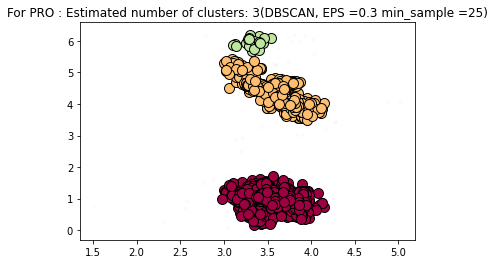

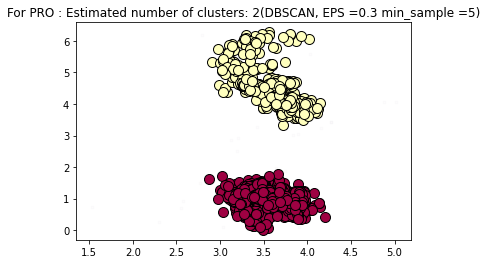

In [73]:
pro_data = org_data[['phi','psi']].loc[org_data['residue name'] == 'PRO']
temp = pro_data.copy()
pro_data_rad = temp.apply(np.radians)

pro_data_shift = (pro_data_rad - np.pi/2) % (2*np.pi)
pro_data_shift = pro_data_shift.values.reshape(-1,2)



neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(pro_data_shift)
distances, indices = neighbors_fit.kneighbors(pro_data_shift)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.plot(distances)
#plt.xlim(1550,1600)

EPS = 0.3
MINSAMPLE = 25
dbscan_plotD(EPS,MINSAMPLE,pro_data_shift,'PRO')
EPS = 0.3
MINSAMPLE = 5
dbscan_plotD(EPS,MINSAMPLE,pro_data_shift,'PRO')

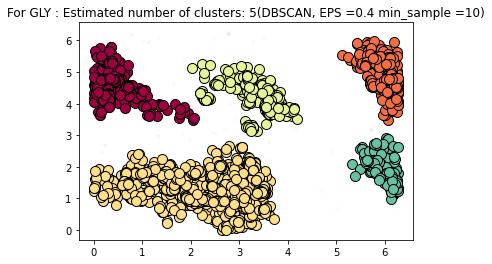

In [71]:
gly_data = org_data[['phi','psi']].loc[org_data['residue name'] == 'GLY']
temp = gly_data.copy()
gly_data_rad = temp.apply(np.radians)

gly_data_shift = (gly_data_rad - np.pi/2) % (2*np.pi)
gly_data_shift = gly_data_shift.values.reshape(-1,2)



neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(gly_data_shift)
distances, indices = neighbors_fit.kneighbors(gly_data_shift)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
#plt.plot(distances)
#plt.xlim(2100,2200)

## .4

EPS = 0.4
MINSAMPLE = 10
dbscan_plotD(EPS,MINSAMPLE,gly_data_shift,'GLY')

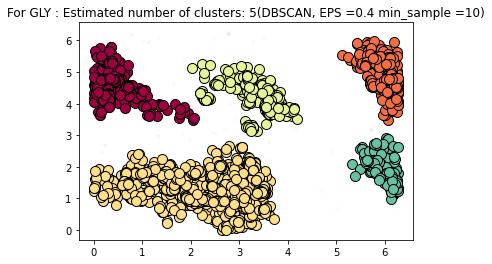

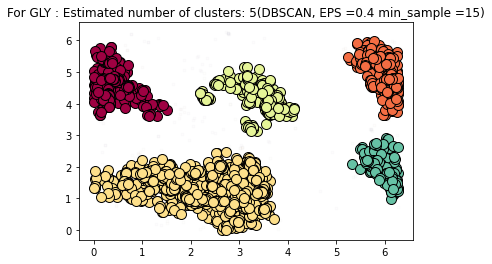

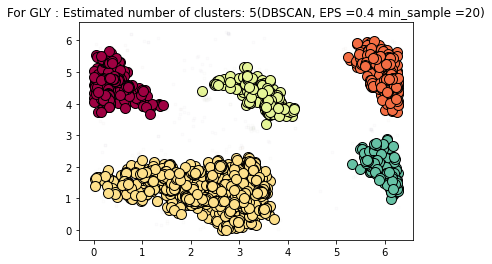

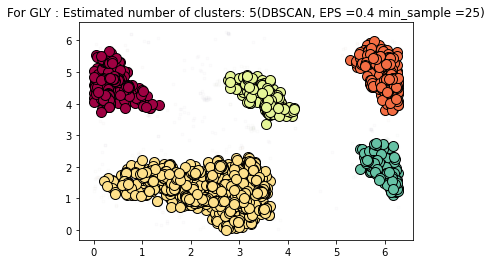

In [66]:
MINSAMPLE = 25
dbscan_plotD(EPS,MINSAMPLE,gly_data_shift,'GLY')